In [1]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Natural Language Processing (NLP)
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Neural Network and Deep Learning
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [3]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Lap Top\Text\AI_Human.csv")

## Data Exploration

In [5]:
df.shape

(487235, 2)

In [6]:
# Display the first 10 rows of the dataset
df.head(10)

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0
5,The electrol college system is an unfair syste...,0.0
6,"Dear state senator, It is the utmost respect t...",0.0
7,"Fellow citizens, cars have become a major role...",0.0
8,"""It's official: The electoral college is unfai...",0.0
9,The Electoral College has been kept for centur...,0.0


In [7]:
# Display dataset information including data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       487235 non-null  object 
 1   generated  487235 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.4+ MB


In [8]:
df["generated"].value_counts()

0.0    305797
1.0    181438
Name: generated, dtype: int64

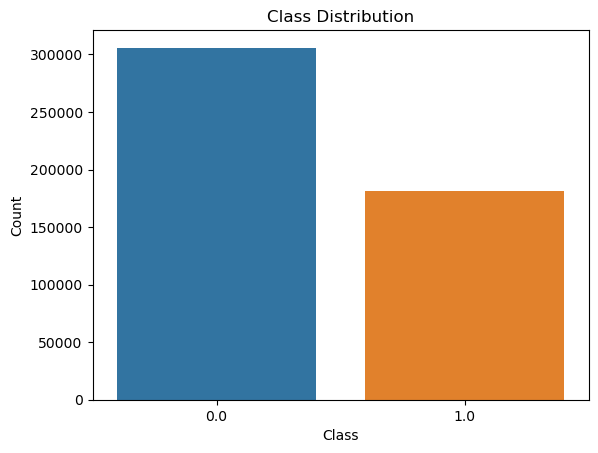

In [9]:
# Visualize the distribution of the target variable 'generated'
sns.countplot(x=df['generated'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Balancing Dataset and Visualizing Class Distribution

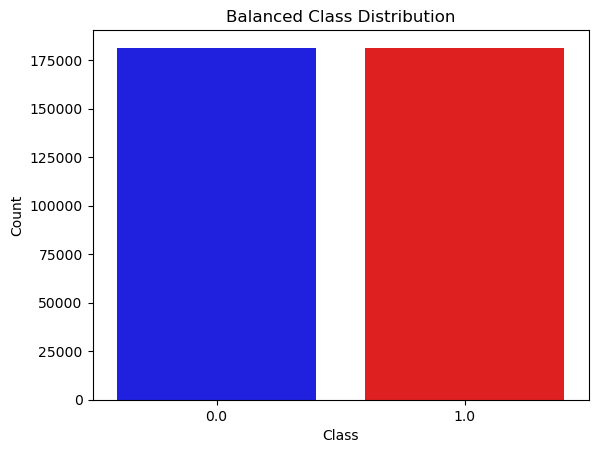

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to load data, balance classes, and return the balanced dataframe
def balance_and_visualize(file_path):
    # Load the dataset
    df = pd.read_csv(file_path)
    
    # Check the class distribution
    class_counts = df['generated'].value_counts()

    # Determine the minimum class size (to balance the classes)
    min_class_size = class_counts.min()

    # Sample the minority class to balance it with the majority class
    class_0 = df[df['generated'] == 0].sample(n=min_class_size, random_state=42)
    class_1 = df[df['generated'] == 1].sample(n=min_class_size, random_state=42)

    # Concatenate the two balanced classes
    balanced_df = pd.concat([class_0, class_1])

    # Shuffle the data
    balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

    # Plot the balanced class distribution using Seaborn with different colors
    sns.countplot(x='generated', data=balanced_df, palette={0: 'blue', 1: 'red'})

    # Add labels and title
    plt.title('Balanced Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Count')
    
    # Show the plot
    plt.show()
    
    # Return the balanced dataframe
    return balanced_df

# Call the function and store the new data in df
df = balance_and_visualize(r"C:\Users\Lap Top\Text\AI_Human.csv")

## Data Preprocessing

In [13]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to C:\Users\Lap
[nltk_data]     Top\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Lap
[nltk_data]     Top\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
# Define stopwords and lemmatizer
english_stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [16]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Precompile regex patterns
non_alpha_re = re.compile(r'\W')
digit_re = re.compile(r'\d')
extra_space_re = re.compile(r'\s+')

lemmatizer = WordNetLemmatizer()
english_stopwords = set(stopwords.words('english'))

def clean_text(text):                  # Function to clean the text
    text = non_alpha_re.sub(' ', text)  # Remove non-alphanumeric characters
    text = digit_re.sub(' ', text)      # Remove digits
    text = text.lower()                 # Convert to lowercase
    text = extra_space_re.sub(' ', text).strip()  # Remove extra spaces
    
    # Remove stopwords & apply Lemmatization
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split() if word not in english_stopwords)

    return text

In [17]:
# Apply the clean_text function to the text column
df['clean_text'] = df['text'].apply(clean_text)

In [18]:
# Display the first few cleaned texts to verify
df['clean_text'].head()

0    burdened fact nation president decided u rathe...
1    tough position would side first main problem a...
2    education lifelong process people believe cont...
3    seems aggravating phrase entire population peo...
4    many people believe invention driverless car m...
Name: clean_text, dtype: object

### Word Clouds

I'll create word clouds for human-generated and AI-generated text to visualize the most common words in each category.

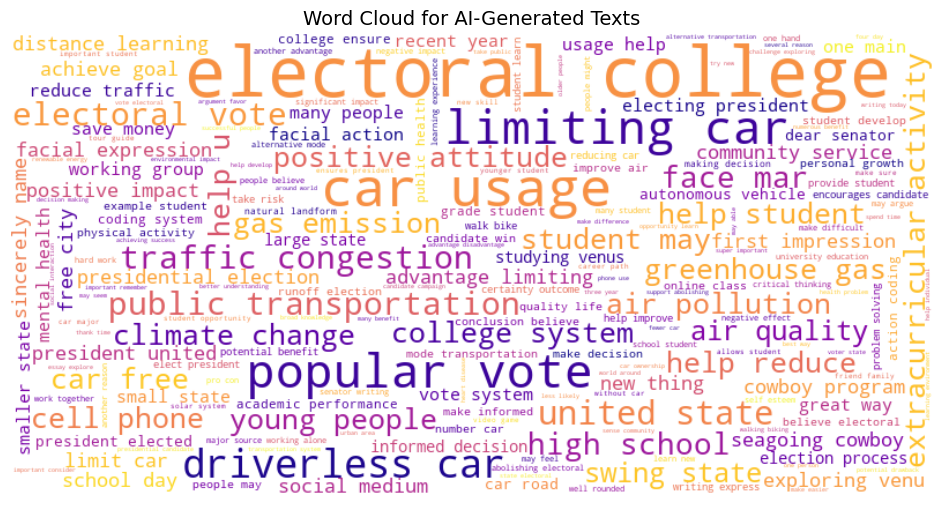

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud for AI texts
ai_data = df[df['generated'] == 1.0]
ai_text = ' '.join(ai_data['clean_text'])

wordcloud = WordCloud(
    width=800, height=400, background_color='white', colormap='plasma',
    max_words=200, max_font_size=60, random_state=42
).generate(ai_text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for AI-Generated Texts", fontsize=14)
plt.show()

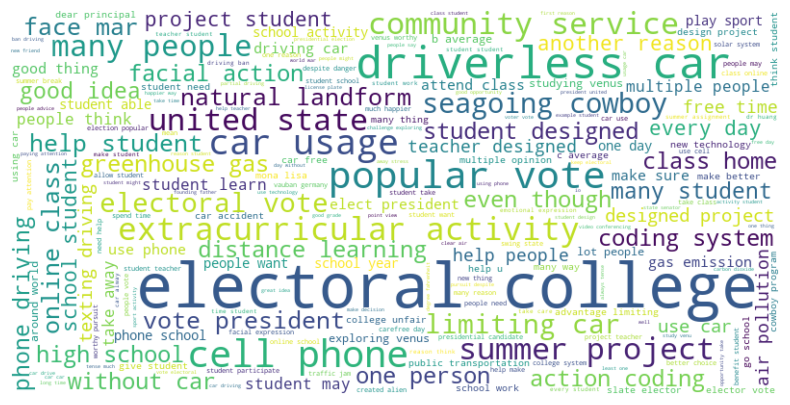

In [21]:
# Generate word cloud for Human texts
human_data = df[df['generated'] == 0.0]
human_text = ' '.join(human_data['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(human_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

I'll convert the cleaned text into numerical features using TF-IDF vectorization.

In [29]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the 'clean_text' column to extract features
X = vectorizer.fit_transform(df['clean_text'])

# Target variable (generated)
y = df['generated']

## Model Building and Evaluation

### Neural Network Approach

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Copy the DataFrame
nn_df = df.copy()

# Tokenization and Padding
max_words = 10000  # Maximum number of words to consider
max_len = 100      # Maximum length of sequences

# Tokenizer setup
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(nn_df['clean_text'])
sequences = tokenizer.texts_to_sequences(nn_df['clean_text'])
X_nn = pad_sequences(sequences, maxlen=max_len)

# Label encoding
label_encoder = LabelEncoder()
y_nn = label_encoder.fit_transform(nn_df['generated'])

# Train-test split
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, y_nn, test_size=0.2, random_state=42)

In [33]:
# Define the neural network architecture
embedding_dim = 64  # Dimension of the embedding vector
model_nn = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
model_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           640000    
                                                                 
 lstm (LSTM)                 (None, 100, 64)           33024     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 687,617
Trainable params: 687,617
Non-trai

In [35]:
# Train the model
history = model_nn.fit(X_train_nn, y_train_nn, epochs=5, batch_size=64, validation_data=(X_test_nn, y_test_nn))

Epoch 1/5
4536/4536 [==============================] - 133s 28ms/step - loss: 0.0494 - accuracy: 0.9846 - val_loss: 0.0203 - val_accuracy: 0.9936
Epoch 2/5
4536/4536 [==============================] - 121s 27ms/step - loss: 0.0177 - accuracy: 0.9948 - val_loss: 0.0200 - val_accuracy: 0.9933
Epoch 3/5
4536/4536 [==============================] - 119s 26ms/step - loss: 0.0096 - accuracy: 0.9972 - val_loss: 0.0136 - val_accuracy: 0.9963
Epoch 4/5
4536/4536 [==============================] - 129s 29ms/step - loss: 0.0061 - accuracy: 0.9981 - val_loss: 0.0117 - val_accuracy: 0.9965
Epoch 5/5
4536/4536 [==============================] - 124s 27ms/step - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.0133 - val_accuracy: 0.9969


Training Accuracy: 0.9989
Validation Accuracy: 0.9969
Training Loss: 0.0036
Validation Loss: 0.0133




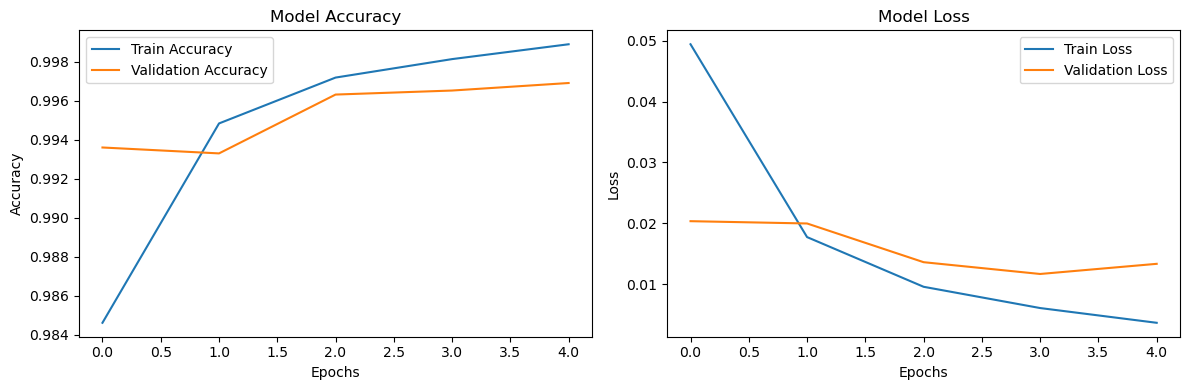

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Function to plot training history
def plot_history(history):
    # Print final train and validation accuracies and losses
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]

    print(f"Training Accuracy: {final_train_acc:.4f}")
    print(f"Validation Accuracy: {final_val_acc:.4f}")
    print(f"Training Loss: {final_train_loss:.4f}")
    print(f"Validation Loss: {final_val_loss:.4f}")
    print("\n========================================\n")

    plt.figure(figsize=(12, 4))
    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot training history
plot_history(history)

In [37]:
# Sample AI-generated text for testing
ai_text = "This is an example of content used to assess the classification accuracy."

# Function to preprocess the text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Preprocess the AI-generated text
cleaned_ai_text = preprocess_text(ai_text)

# Tokenize and pad the text
sequence = tokenizer.texts_to_sequences([cleaned_ai_text])
padded_sequence = pad_sequences(sequence, maxlen=max_len)

# Make a prediction
prediction = model_nn.predict(padded_sequence)

# Convert prediction to class label
predicted_class = label_encoder.inverse_transform([1 if prediction[0][0] > 0.5 else 0])

# Display the result
print(f"AI-generated text: {ai_text}")
print(f"Predicted class: {predicted_class[0]}")

1/1 [==============================] - 1s 660ms/step
AI-generated text: This is an example of content used to assess the classification accuracy.
Predicted class: 1.0
